In [ ]:
# 나라별 독립변수에 따른 행복지수에 미치는 영향 분석 및 행복 지수 예측모델 만들기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
"""
독립변수인 행복 지수와 영향을 미칠 것 같은 종속변수들의 CSV파일의 데이터를 
jupyter 노트북으로의 표현
"""
"""
HPI = Happy Planet Index (행복 지수)
QLI = Quality of life Index (삶의 질 지수)
PPI = Purchasing Power Index (구매력 지수)
SI = Safety Index (안전 지수)
HCI = Health Care Index (건강 관리 지수)
CLI = Cost of Living Index (생활비지수)
PPIR = Property Price to Income Ratio (부동산 가격 대 소득 비율)
TCTI = Traffic Commute Time Index (교통 통근 시간 지수)
PI = Pollution Index (오염 지수)
CI = Climate Index (기후 지수)
"""


df= pd.read_csv('happy.csv')
df

,Country,QLI,PPI,SI,HCI,CLI,PPIR,TCTI,PI,CI,HPI
0,Switzerland,190.82,110.95,78.65,74.46,131.74,8.42,28.73,20.09,80.05,7.512
1,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.80,7.636
2,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11,7.415
3,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64,7.821
4,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,7.163
...,...,...,...,...,...,...,...,...,...,...,...
75,Philippines,78.39,19.71,57.84,67.09,40.65,30.14,44.04,74.06,61.03,5.904
76,Kenya,75.77,27.67,38.60,55.83,36.30,27.27,57.39,75.88,99.79,4.543
77,Bangladesh,65.27,24.07,35.78,42.70,33.31,14.43,58.53,84.91,72.91,5.155
78,Iran,64.73,19.00,50.81,52.25,41.34,34.24,47.43,76.13,70.99,4.888


In [583]:
"""데이터의 행과 열의 갯수 확인"""

df.shape        

(80, 11)

In [584]:
"""데이터 결측치 확인"""

df.isna().sum()

Country    0
QLI        0
PPI        0
SI         0
HCI        0
CLI        0
PPIR       0
TCTI       0
PI         0
CI         0
HPI        0
dtype: int64

In [585]:
"""상위 10개 목록을 표현"""

df.head(10)

,Country,QLI,PPI,SI,HCI,CLI,PPIR,TCTI,PI,CI,HPI
0,Switzerland,190.82,110.95,78.65,74.46,131.74,8.42,28.73,20.09,80.05,7.512
1,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.80,7.636
2,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11,7.415
3,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64,7.821
4,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,7.163
5,Australia,181.52,99.29,57.56,77.71,84.14,7.38,35.04,23.48,92.70,7.162
6,Iceland,179.10,71.88,75.87,65.69,96.77,6.31,19.98,16.24,68.81,7.557
7,Germany,176.76,93.72,64.58,73.77,70.62,9.12,31.36,27.48,82.97,7.034
8,New Zealand,175.77,81.44,57.74,73.58,79.14,8.09,30.70,23.81,96.35,7.200
9,Norway,173.57,79.43,66.65,75.50,106.09,8.49,26.87,18.14,68.68,7.365


In [6]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm

In [612]:
"""
H0: 삶의 질 지수의 차이에 따른 행복 지수의 차이가 없다.
H1: 삶의 질 지수의 차이에 따른 행복 지수의 차이가 있다.
P_value = 0.159946, 유의수준=0.05, 즉 P>0.05이므로 귀무가설 채택

결론:  삶의 질 지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다.  
"""

model= ols('HPI ~ C(QLI)' , df).fit()  
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(QLI),77.0,65.994359,0.857070,5.724626,0.159946
Residual,2.0,0.299433,0.149716,NaN,NaN


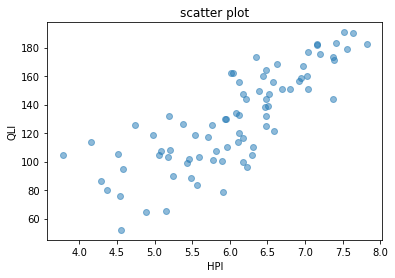

[[1.         0.80583432]
 [0.80583432 1.        ]]


In [588]:
plt.scatter(df['HPI'],df['QLI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('QLI')
plt.show()
a1= np.corrcoef(df.HPI,df.QLI)                     #매우 높은 양의 상관관계를 나타냄
print(a1)

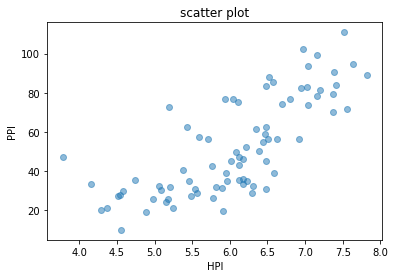

[[1.         0.75207123]
 [0.75207123 1.        ]]


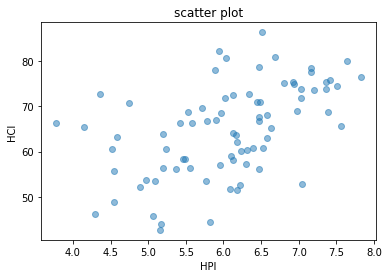

[[1.         0.51341001]
 [0.51341001 1.        ]]


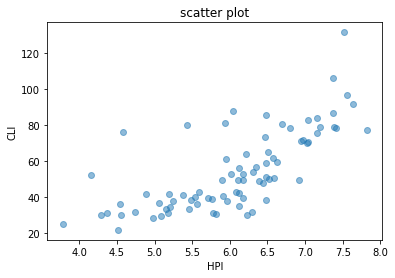

[[1.         0.72101815]
 [0.72101815 1.        ]]


In [611]:
"""
같은 방식으로
H0: 구매력 지수, 건강 관리 지수, 생활비지수 (PPI, HCI, CLI)에 따른 행복 지수의 차이가 없다.
H1: 구매력 지수, 건강 관리 지수, 생활비지수 (PPI, HCI, CLI)에 따른 행복 지수의 차이가 있다.
유의수준=0.05, P-value값 다 0.05보다 높게 측정됨, 즉 P>0.05이므로 귀무가설 채택

결론:구매력 지수, 건강 관리 지수, 생활비지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다.  
"""
plt.scatter(df['HPI'],df['PPI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('PPI')
plt.show()
a2= np.corrcoef(df.HPI,df.PPI)                     #높은 양의 상관관계를 나타냄

print(a2)
plt.scatter(df['HPI'],df['HCI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('HCI')
plt.show()
a4= np.corrcoef(df.HPI,df.HCI)                    #보통인 양의 상관관계를 나타냄

print(a4)
plt.scatter(df['HPI'],df['CLI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('CLI')
plt.show()
a5= np.corrcoef(df.HPI,df.CLI)                    #높은 양의 상관관계를 나타냄
print(a5)

In [592]:
"""
H0: 안전 지수에 따른 행복 지수의 차이가 없다.
H1: 안전 지수에 따른 행복 지수의 차이가 있다.
P_value = 0.960988, 유의수준=0.05, 즉  P>0.05이므로 귀무가설 채택

결론: 안전 지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다.  
"""

model= ols('HPI ~ C(SI)' , df).fit()              
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(SI),78.0,62.748007,0.804462,0.226878,0.960988
Residual,1.0,3.545785,3.545785,NaN,NaN


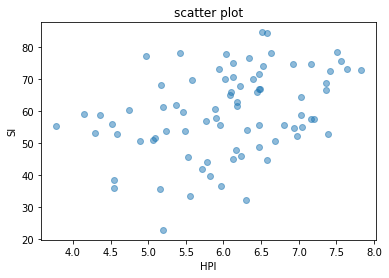

[[1.         0.37079122]
 [0.37079122 1.        ]]


In [593]:
plt.scatter(df['HPI'],df['SI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('SI')
plt.show()

a3= np.corrcoef(df.HPI,df.SI)                   #낮은 양의 상관관계를 나타냄
print(a3)

In [598]:
"""
H0: 부동산 가격 대 소득 비율에 따른 행복 지수의 차이가 없다.
H1: 부동산 가격 대 소득 비율에 따른행복 지수의 차이가 있다.
P_value = 0.295657, 유의수준=0.05, 즉 P>0.05이므로 귀무가설 채택
결론: 부동산 가격 대 소득 비율에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다. 
"""

model= ols('HPI ~ C(PPIR)' , df).fit()  
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(PPIR),77.0,65.693015,0.853156,2.840178,0.295657
Residual,2.0,0.600777,0.300388,NaN,NaN


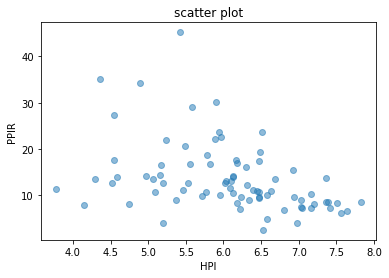

[[ 1.         -0.40396876]
 [-0.40396876  1.        ]]


In [599]:
plt.scatter(df['HPI'],df['PPIR'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('PPIR')
plt.show()
a6= np.corrcoef(df.HPI,df.PPIR)                   #보통인 양의 상관관계를 나타냄
print(a6)

In [600]:
"""
H0: 교통 통근 시간 지수에 따른 행복 지수의 차이가 없다.
H1: 교통 통근 시간 지수에 따른 행복 지수의 차이가 있다.
P_value = 0.188361, 유의수준=0.05, 즉 P>0.05이므로 귀무가설 채택
결론: 교통 통근 시간 지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다. 
"""

model= ols('HPI ~ C(TCTI)' , df).fit()  
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(TCTI),77.0,65.347223,0.848665,1.793141,0.42517
Residual,2.0,0.946569,0.473284,NaN,NaN


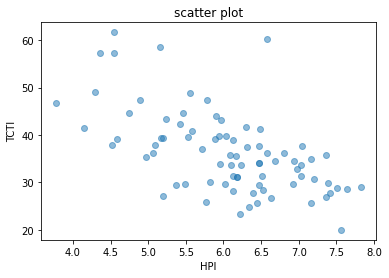

[[ 1.         -0.59436605]
 [-0.59436605  1.        ]]


In [575]:
plt.scatter(df['HPI'],df['TCTI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('TCTI')
plt.show()
a7= np.corrcoef(df.HPI,df.TCTI)                   #보통인 양의 상관관계를 나타냄
print(a7)

In [601]:
"""
H0: 오염 지수에 따른 행복 지수의 차이가 없다.
H1: 오염 지수에 따른 행복 지수의 차이가 있다.
P_value = 0.502966, 유의수준=0.05, 즉 P>0.05이므로 귀무가설 채택
결론: 오염 지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다. 
"""

model= ols('HPI ~ C(PI)' , df).fit()  
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(PI),78.0,65.900407,0.844877,2.147713,0.502966
Residual,1.0,0.393384,0.393384,NaN,NaN


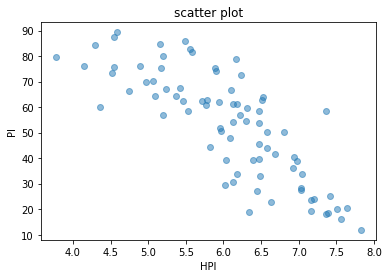

[[ 1.         -0.80213733]
 [-0.80213733  1.        ]]


In [602]:
plt.scatter(df['HPI'],df['PI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('PI')
plt.show()
a8= np.corrcoef(df.HPI,df.PI)                  #매우 높은 음의 상관관계를 나타냄
print(a8)

In [603]:
"""
H0: 기후 지수에 따른 행복 지수의 차이가 없다.
H1: 기후 지수에 따른 행복 지수의 차이가 있다.
P_value = 0.699304, 유의수준=0.05, 즉 P>0.05이므로 귀무가설 채택
결론: 기후 지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다. 
"""

model= ols('HPI ~ C(CI)' , df).fit()  
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(CI),78.0,65.383891,0.838255,0.92126,0.699304
Residual,1.0,0.909901,0.909901,NaN,NaN


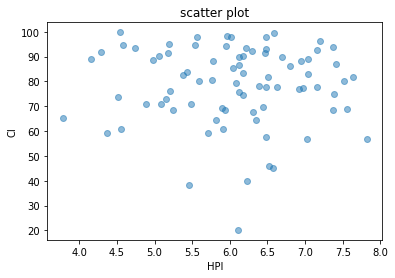

[[ 1.         -0.02901094]
 [-0.02901094  1.        ]]


In [604]:
plt.scatter(df['HPI'],df['CI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('CI')
plt.show()
a9= np.corrcoef(df.HPI,df.CI)                          #상관관계가 없다
print(a9)

In [ ]:
"""
결과: 행복 지수인 종속변수에 영향을 미치는 독립변수는 없었다. 
즉, 행복은 삶의 질, 구매력, 오염, 기후 지수 등 위에서 말한 독립변수들에 따라
움직인다고 말할 수 없다.
"""

In [ ]:
"""
    🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓🠓
"""

In [ ]:
# 이제는 반대로 PPI,SI,HCI,CLI ... CI에 따른 행복 지수의 값에 대한 예측모델을 세울 것울 것이며
# 테스트 및 정확도 등을 알아볼 것이다.

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [303]:
"""y의 값"""

dependent_variable = 'HPI'

In [304]:
independent_variables= df.columns.tolist()

In [305]:
independent_variables.remove(dependent_variable)

In [307]:
independent_variables.remove('Country')

In [664]:
"""x의 값 """

independent_variables

['QLI', 'PPI', 'SI', 'HCI', 'CLI', 'PPIR', 'TCTI', 'PI', 'CI']

In [665]:
x = df[independent_variables].values               #x값 설정
y= df[dependent_variable].values                   #y값 설정
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

regressor=LinearRegression()                       #데이터 셋을 트레인 셋과 테스트 셋으로 분할
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)                    #y 예측값 설정
print(y_pred)

r2_score(y_test,y_pred)                             # 41% 점수를 보임

[5.52854607 6.45909929 6.48006005 4.80873188 5.54596652 5.19175833
 5.62861622 5.59787832 5.73021982 6.02173563 5.82790327 5.39006283
 7.04166809 4.83517649 5.77039611 5.83081339]


0.41705353685886026

In [668]:
regressor.predict([[130.02, 76.6, 73.14, 82.3, 81.2, 23.63, 39.88, 61.85, 68.39]])  
                  
                  #독립변수 다 있을 때 대한민국 행복 지수 값 6.56096171

array([6.56096171])

In [644]:
# 정확도를 높이기 위해 위에 나온 변수들 중에 행복지수와 관련이없다고 생각한 'CI'를 제거해 보았다
independent_variables_2 = ['QLI', 'PPI', 'SI', 'HCI', 'CLI', 'PPIR', 'TCTI', 'PI']
x = df[independent_variables_2].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

regressor=LinearRegression()                       
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)                   
print(y_pred)

r2_score(y_test,y_pred)                                # 46% 의 점수를 보여줌 (5%향상)

[5.59362773 6.43929325 6.42811632 4.79397949 5.64182912 5.38789208
 5.60684698 5.53319386 5.82487184 5.82454511 5.80812885 5.41097853
 7.11779167 4.84834985 5.66679311 5.90859369]


0.4613066151238412

In [645]:
# 정확도를 또 높이는 실험을 위해 위에 나온 변수들 중에 'SI'를 제거해 보았다.
independent_variables_3= ['QLI', 'PPI', 'HCI', 'CLI', 'PPIR', 'TCTI', 'PI','CI']
x = df[independent_variables_3].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
regressor=LinearRegression()                       
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
print(y_pred)
                  
r2_score(y_test,y_pred)                        

[5.59369534 6.43934579 6.42804175 4.79404994 5.64178106 5.38789084
 5.6067032  5.53327105 5.82487657 5.82442559 5.80810439 5.41126292
 7.11779633 4.84838849 5.66654254 5.90866706]


0.46130062801301186

In [656]:
# 정확도를 또 높이는 실험을 위해 위에 나온 변수들 중에 'QLI'를 제거해 보았다.
independent_variables_4= [ 'PPI', 'HCI', 'CLI', 'PPIR', 'TCTI', 'PI','CI']
x = df[independent_variables_4].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
regressor=LinearRegression()                       
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
print(y_pred)
                  
r2_score(y_test,y_pred)                        

[5.62550746 6.44859327 6.4500724  4.80256299 5.58482076 5.30341767
 5.53384958 5.42893181 5.7199098  5.78702121 5.81578068 5.4323075
 7.14587022 4.9187383  5.57992578 5.97008363]


0.41945215562744187

In [647]:
# 정확도를 또 높이는 실험을 위해 위에 나온 변수들 중에 'TCTI'를 제거해 보았다.
independent_variables_5= ['QLI', 'PPI', 'HCI', 'CLI', 'SI','PPIR', 'PI','CI']
x = df[independent_variables_5].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
regressor=LinearRegression()                       
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
print(y_pred)
                  
r2_score(y_test,y_pred)                        

[5.59340759 6.43937586 6.42834417 4.79376265 5.64170001 5.38790095
 5.60715718 5.53385805 5.82494626 5.82521859 5.80828933 5.41097001
 7.11753206 4.84801981 5.66706219 5.90822426]


0.4612984142727232

In [657]:
# 정확도를 또 높이는 실험을 위해 위에 나온 변수들 중에 'HCI'를 제거해 보았다.
independent_variables_6= ['QLI', 'PPI', 'CLI','SI', 'PPIR', 'TCTI', 'PI','CI']
x = df[independent_variables_6].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
regressor=LinearRegression()                       
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
print(y_pred)
                  
r2_score(y_test,y_pred)                        

[5.59370836 6.43931869 6.4278623  4.79380592 5.64207536 5.38796888
 5.60696841 5.53368411 5.82519779 5.82476074 5.80806428 5.41122752
 7.1177099  4.84805204 5.66688889 5.90824727]


0.46135462092062873

In [649]:
''' 

반복

'''

' \n\n반복\n\n'

In [650]:
#독립변수 한개 제거했을 때는 'CI'를 제거했을 때 제일 높게 나타남

In [651]:
#이제 제일 제외했을 때 높게 나타난 CI와 함께 한가지 변수를 더 제외해보자

In [669]:
independent_variables_7 = ['QLI', 'PPI', 'HCI', 'SI', 'PPIR', 'TCTI', 'PI']
x = df[independent_variables_7].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

regressor=LinearRegression()                       
regressor.fit(x_train,y_train)                    #여러가지 시행중
                                                  #CLI CI를 제거했을 때 높은 점수가 나타남

y_pred=regressor.predict(x_test)                   
print(y_pred)

r2_score(y_test,y_pred)

[5.235313   6.43208194 6.11483949 4.61881497 5.70214141 5.210057
 5.34261749 5.53188079 5.97614087 4.99110044 5.74132135 5.47428754
 7.15093263 4.70005172 5.85518404 6.04920415]


0.6563724515972538

In [670]:
regressor.predict([[130.02,76.6,73.14,82.3,23.63,39.88,61.85]])  
                                             #가장 높은 점수 모델을 가지고 한국 값을 넣었더니
                                             # 실제 값=5.935, 아까보다 매우 근접한 결과

array([6.08161328])

In [659]:
independent_variables_8 = ['QLI', 'PPI', 'HCI', 'PPIR', 'TCTI', 'PI']
x = df[independent_variables_8].values               
y= df[dependent_variable].values                   
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

regressor=LinearRegression()                       
regressor.fit(x_train,y_train)                     
                                                 #CL CI포함해 3개를 제외하면 아까보다 떨어짐

y_pred=regressor.predict(x_test)                   
print(y_pred)

r2_score(y_test,y_pred)

[5.24591817 6.44467893 6.10422631 4.63541495 5.68451653 5.19554139
 5.31495577 5.55305733 5.96939182 4.98395593 5.73791633 5.53236308
 7.14600926 4.70773168 5.80959455 6.05823339]


0.6497529615701367

In [655]:
pred_y_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]                                   
                                                   #실제 값과 예측값을 통한 가치 확인
                                                   #차이 값 확인

,Actual,Predicted,Difference
0,4.152,5.245918,-1.093918
1,6.180,6.444679,-0.264679
2,6.221,6.104226,0.116774
3,5.155,4.635415,0.519585
4,6.128,5.684517,0.443483
5,5.485,5.195541,0.289459
6,6.172,5.314956,0.857044
7,6.234,5.553057,0.680943
8,5.711,5.969392,-0.258392
9,4.584,4.983956,-0.399956


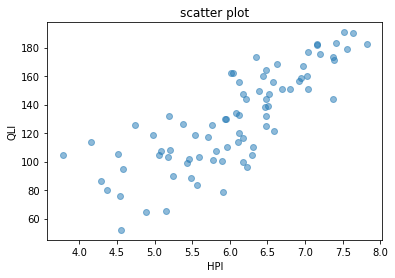

[[1.         0.80583432]
 [0.80583432 1.        ]]


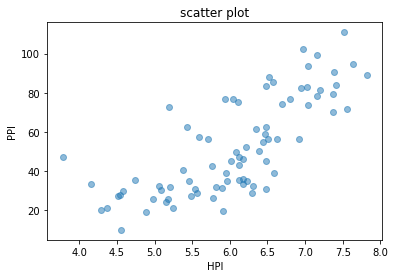

[[1.         0.75207123]
 [0.75207123 1.        ]]


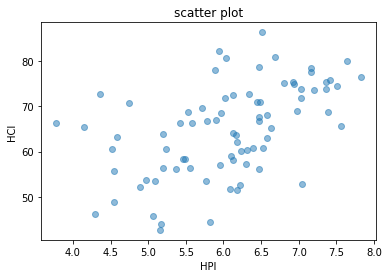

[[1.         0.51341001]
 [0.51341001 1.        ]]


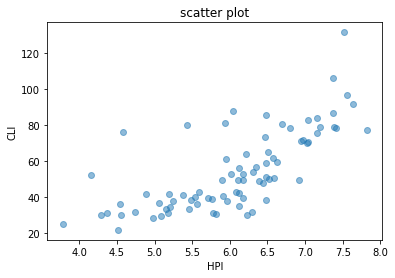

[[1.         0.72101815]
 [0.72101815 1.        ]]


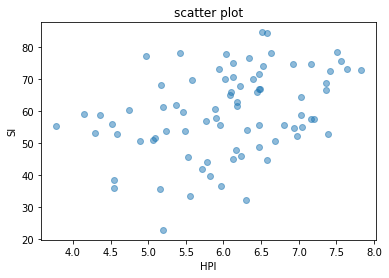

In [12]:
plt.scatter(df['HPI'],df['QLI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('QLI')
plt.show()
a1= np.corrcoef(df.HPI,df.QLI)                     #매우 높은 양의 상관관계를 나타냄
print(a1)

"""
같은 방식으로
H0: 구매력 지수, 건강 관리 지수, 생활비지수 (PPI, HCI, CLI)에 따른 행복 지수의 차이가 없다.
H1: 구매력 지수, 건강 관리 지수, 생활비지수 (PPI, HCI, CLI)에 따른 행복 지수의 차이가 있다.
유의수준=0.05, P-value값 다 0.05보다 높게 측정됨, 즉 P>0.05이므로 귀무가설 채택

결론:구매력 지수, 건강 관리 지수, 생활비지수에 따른 행복 지수의 차이가 있다는 근거가 충분하지 않다.  
"""
plt.scatter(df['HPI'],df['PPI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('PPI')
plt.show()
a2= np.corrcoef(df.HPI,df.PPI)                     #높은 양의 상관관계를 나타냄

print(a2)
plt.scatter(df['HPI'],df['HCI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('HCI')
plt.show()
a4= np.corrcoef(df.HPI,df.HCI)                    #보통인 양의 상관관계를 나타냄

print(a4)
plt.scatter(df['HPI'],df['CLI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('CLI')
plt.show()
a5= np.corrcoef(df.HPI,df.CLI)                    #높은 양의 상관관계를 나타냄
print(a5)
plt.scatter(df['HPI'],df['SI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('SI')
plt.show()



[[1.         0.37079122]
 [0.37079122 1.        ]]


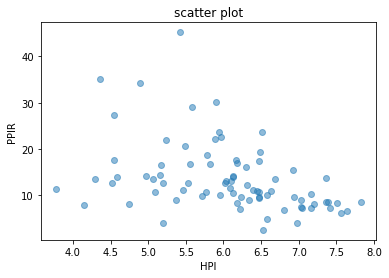

[[ 1.         -0.40396876]
 [-0.40396876  1.        ]]


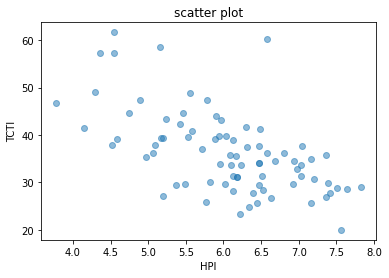

[[ 1.         -0.59436605]
 [-0.59436605  1.        ]]


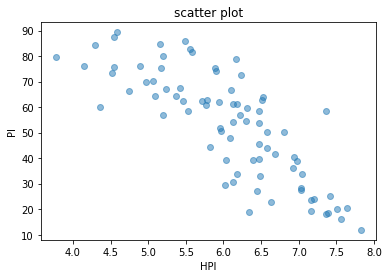

[[ 1.         -0.80213733]
 [-0.80213733  1.        ]]


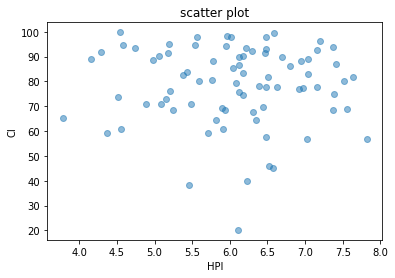

[[ 1.         -0.02901094]
 [-0.02901094  1.        ]]


In [13]:
a3= np.corrcoef(df.HPI,df.SI)                   #낮은 양의 상관관계를 나타냄
print(a3)
plt.scatter(df['HPI'],df['PPIR'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('PPIR')
plt.show()
a6= np.corrcoef(df.HPI,df.PPIR)                   #보통인 양의 상관관계를 나타냄
print(a6)
plt.scatter(df['HPI'],df['TCTI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('TCTI')
plt.show()
a7= np.corrcoef(df.HPI,df.TCTI)                   #보통인 양의 상관관계를 나타냄
print(a7)
plt.scatter(df['HPI'],df['PI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('PI')
plt.show()
a8= np.corrcoef(df.HPI,df.PI)                  #매우 높은 음의 상관관계를 나타냄
print(a8)
plt.scatter(df['HPI'],df['CI'],alpha=0.5)
plt.title('scatter plot')
plt.xlabel('HPI')
plt.ylabel('CI')
plt.show()
a9= np.corrcoef(df.HPI,df.CI)                          #상관관계가 없다
print(a9)